In [17]:
!pip install seaborn

In [33]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as sk

In [34]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


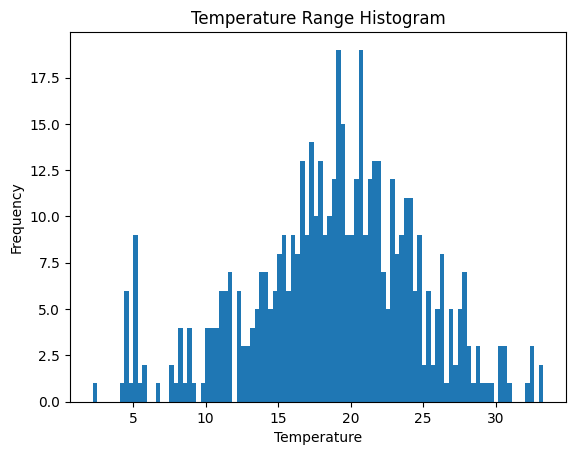

In [35]:
#ax = sns.countplot(x="temp",data=df)
plt.hist(df['temp'], bins=100)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Range Histogram')
plt.show()


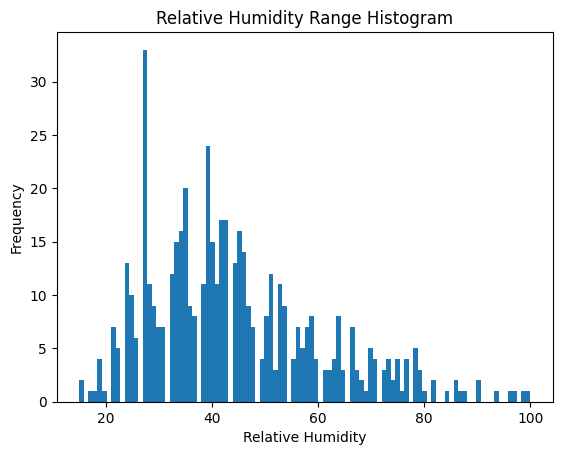

In [18]:
plt.hist(df['RH'], bins=100)
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.title('Relative Humidity Range Histogram')
plt.show()

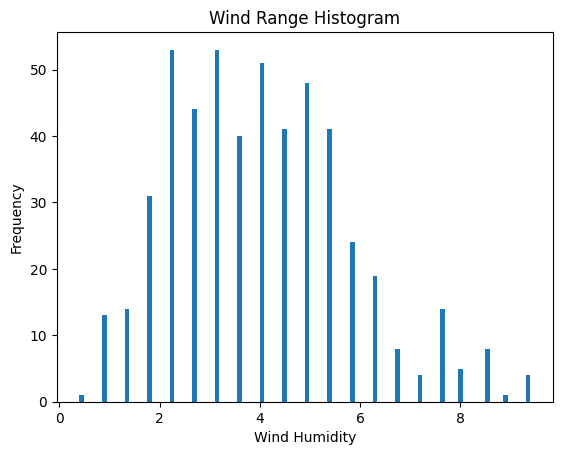

In [23]:
plt.hist(df['wind'], bins=100)
plt.xlabel('Wind Humidity')
plt.ylabel('Frequency')
plt.title('Wind Range Histogram')
plt.show()

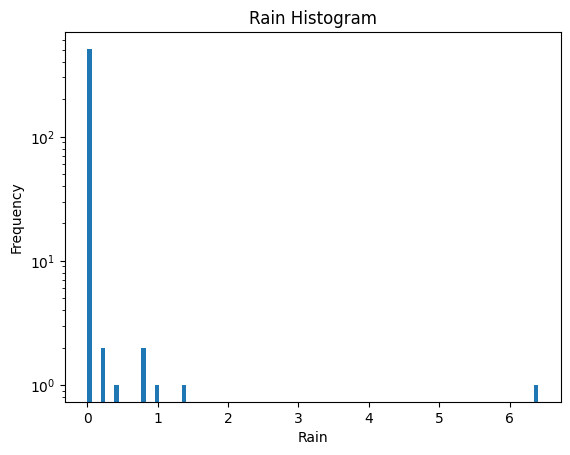

In [47]:
plt.hist(df['rain'], bins=100)
plt.yscale('log')
plt.xlabel('Rain')
plt.ylabel('Frequency')
plt.title('Rain Histogram')
plt.show()

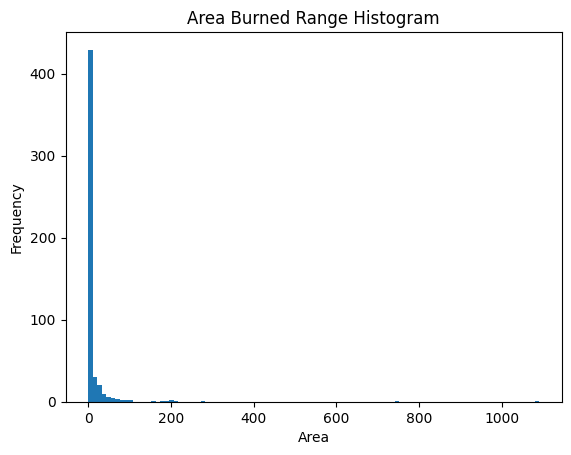

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64
[   0.      0.09    0.17    0.21    0.24    0.33    0.36    0.41    0.43
    0.47    0.52    0.54    0.55    0.61    0.68    0.71    0.72    0.75
    0.76    0.77    0.79    0.9     0.95    0.96    1.01    1.07    1.09
    1.1     1.12    1.19    1.23    1.26    1.29    1.36    1.38    1.43
    1.46    1.47    1.52    1.56    1.58    1.61    1.63    1.64    1.69
    1.72    1.75    1.76    1.9     1.94    1.95    2.      2.01    2.03
    2.07    2.13    2.14    2.17    2.18    2.21    2.29    2.35    2.44
    2.47    2.51    2.53    2.55    2.57    2.64    2.69    2.74    2.75
    2.77    2.87    2.93    3.05    3.07    3.09    3.18    3.19    3.2
    3.3     3.32    3.33    3.35    3.5     3.52    3.63    3.64    3.71
    3.78    3.93    3.94    3.95    4.25    4.4     4.41    4.42    4.53
   

In [20]:
plt.hist(df['area'], bins=100)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Area Burned Range Histogram')
plt.show()
print(df['area'].describe())
print(np.sort(df['area'].unique()))

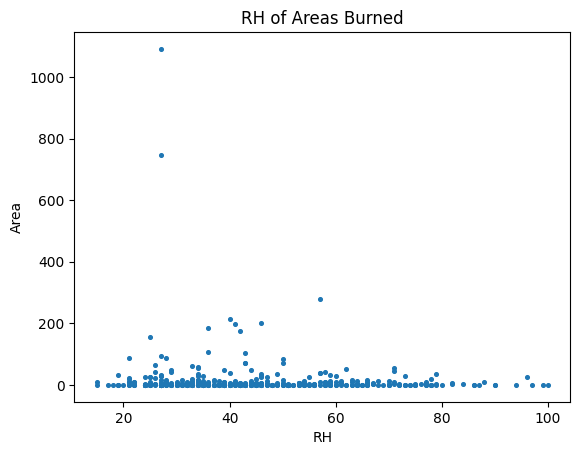

In [9]:
plt.scatter(df['RH'],df['area'], s=7)
plt.xlabel('RH')
plt.ylabel('Area')
plt.title('RH of Areas Burned')
plt.show()

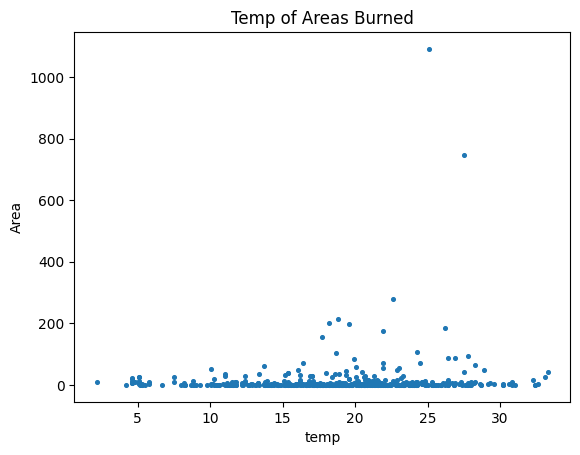

In [10]:
plt.scatter(df['temp'],df['area'], s=7)
plt.xlabel('temp')
plt.ylabel('Area')
plt.title('Temp of Areas Burned')
plt.show()

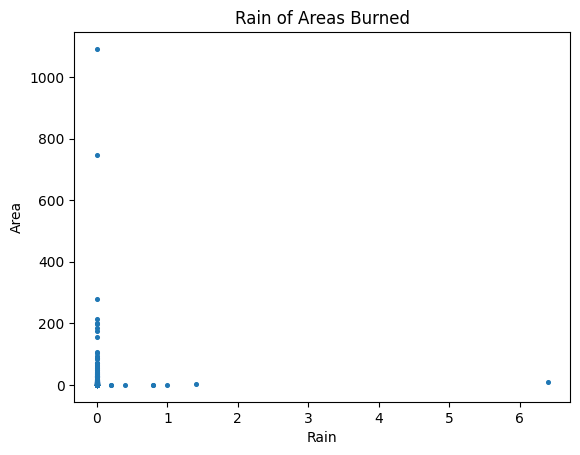

In [11]:
plt.scatter(df['rain'],df['area'], s=7)
plt.xlabel('Rain')
plt.ylabel('Area')
plt.title('Rain of Areas Burned')
plt.show()

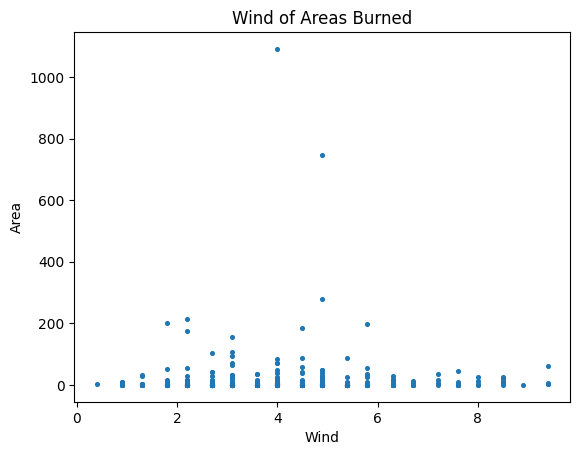

In [12]:
plt.scatter(df['wind'],df['area'], s=7)
plt.xlabel('Wind')
plt.ylabel('Area')
plt.title('Wind of Areas Burned')
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 2 0 1 0 0 0 0 1 0 0 0 1 2 0 1 0 0
 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 2 1 2 2 2 1 1 2 0 1 2 0 0 0 0 0 0 1 1 3 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 1 0 0 1 0 1 2 1 1 1 1 0 0 0 0 1 1 2 2
 1 0 0 0 3 1 1 1 0 0 1 1 1 2 0 0 1 1 1 1 1 1 2 1 0 0 1 1 1 0 1 1 2 1 0 2 0
 2 0 0 0 2 2 0 3 0 0 1 2 1 2 2 2 2 0 2 0 1 2 3 0 0 3 1 1 0 0 1 1 0 0 1 0 1
 0 1 0 0 1 1 0 0 3 1 0 1 1 3 0 1 0 1 0 0 1 0 1 0 1 0 2 0 0 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 3 1 1 0 0 1 1 1 1 1 1 1 3 0 2 1 3 2 1 1 1 1 3 1
 0 1 0 2 1 1 2 2 0 0 0 0 

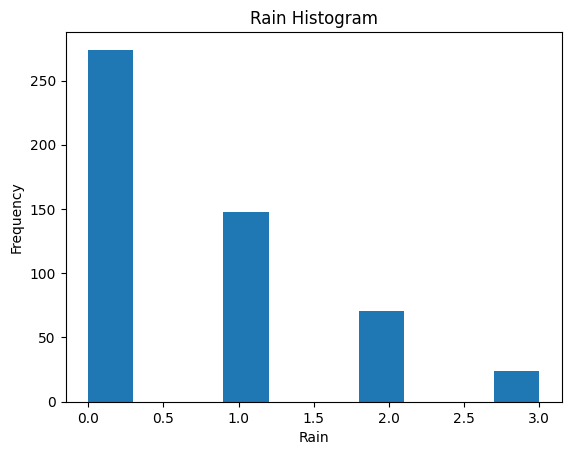

In [36]:
lab = df['area'].to_numpy().astype(np.float32)
#print(y)
y = []
for i in lab:
    #if i > 100 :
    #    y.append(4)
    if i > 50:
        y.append(3)
    elif i > 10:
        y.append(2)
    elif i > 1:
        y.append(1)
    else:
        y.append(0)
y = np.array(y)
print(y)
plt.hist(y)
#plt.yscale('log')
plt.xlabel('Rain')
plt.ylabel('Frequency')
plt.title('Rain Histogram')
plt.show()

In [21]:
unique, counts = np.unique(y, return_counts=True)
print(counts)
w_0, w_1, w_2, w_3 = counts/counts[0]
print(w_0, w_1, w_2, w_3)

[26]


ValueError: not enough values to unpack (expected 4, got 1)

In [37]:
df2 = df.drop(columns=['area', 'X', 'Y', 'day', 'FFMC', 'DMC', 'DC', 'ISI'])
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df2['month'] = df2['month'].map(month_mapping)
X = df2.to_numpy()
df2.head()



,month,temp,RH,wind,rain
0,3,8.2,51,6.7,0.0
1,10,18.0,33,0.9,0.0
2,10,14.6,33,1.3,0.0
3,3,8.3,97,4.0,0.2
4,3,11.4,99,1.8,0.0


In [38]:
#stdsc = StandardScaler()
#stdsc.fit(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.05)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )
print(X_train[0])

(491, 5) (26, 5) (491,) (26,)
[ 2.  15.7 43.   3.1  0. ]


In [41]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation = 'relu', input_dim=X_train.shape[1]),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.1),
  #tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(4, activation = "softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                384       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 4)                

In [45]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"], weighted_metrics=["accuracy"])
m = model.fit(X_train, y_train, epochs = 40, batch_size = 64, validation_data = (X_test, y_test), class_weight={0: w_0, 1: w_1, 2: w_2, 3: w_3})

Epoch 1/40
8/8 [==============================] - 2s 42ms/step - loss: 0.7656 - accuracy: 0.5316 - weighted_accuracy: 0.7329 - val_loss: 1.3347 - val_accuracy: 0.5000 - val_weighted_accuracy: 0.5000
Epoch 2/40
8/8 [==============================] - 0s 8ms/step - loss: 0.7395 - accuracy: 0.5316 - weighted_accuracy: 0.7329 - val_loss: 1.3829 - val_accuracy: 0.5000 - val_weighted_accuracy: 0.5000
Epoch 3/40
8/8 [==============================] - 0s 8ms/step - loss: 0.7292 - accuracy: 0.5316 - weighted_accuracy: 0.7329 - val_loss: 1.3192 - val_accuracy: 0.5000 - val_weighted_accuracy: 0.5000
Epoch 4/40
8/8 [==============================] - 0s 7ms/step - loss: 0.7138 - accuracy: 0.5316 - weighted_accuracy: 0.7329 - val_loss: 1.3534 - val_accuracy: 0.5000 - val_weighted_accuracy: 0.5000
Epoch 5/40
8/8 [==============================] - 0s 8ms/step - loss: 0.7089 - accuracy: 0.5316 - weighted_accuracy: 0.7329 - val_loss: 1.3087 - val_accuracy: 0.5000 - val_weighted_accuracy: 0.5000
Epoch 6/4

In [46]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmpil3mf0sp/assets


INFO:tensorflow:Assets written to: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmpil3mf0sp/assets
2024-04-08 16:59:27.286847: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-04-08 16:59:27.286863: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-04-08 16:59:27.287060: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmpil3mf0sp
2024-04-08 16:59:27.289471: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-04-08 16:59:27.289488: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/0h/6n00vdv946jf7_mzgjpw2z980000gn/T/tmpil3mf0sp
2024-04-08 16:59:27.296227: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-04-08 16:59:27.365033: I tensorflow/cc/saved_model/loader.cc:217] Running initialization

1/1 [==============================] - 0s 67ms/step
0.5


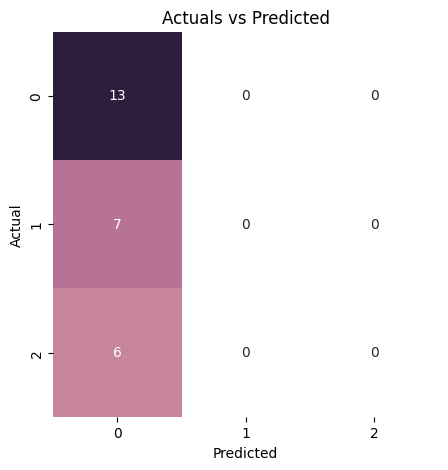

In [44]:
p = model.predict(X_test)
y = np.argmax(p, axis=1)
#print(y)
print(sk.metrics.accuracy_score(y_test, y))
data = sk.metrics.confusion_matrix(y_test, y)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'


f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(df_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 10})
plt.title('Actuals vs Predicted')
plt.show() 